# Bagging Machine Learning Algorithm

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)

In [6]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [7]:
df['pclass'].value_counts()

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

sex
male      94
female    88
Name: count, dtype: int64

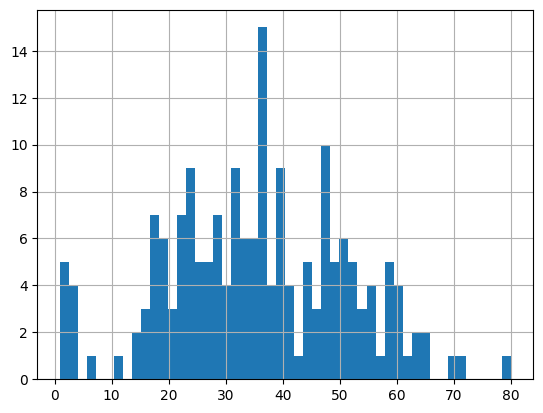

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\informatika\AppData\Local\Temp\ipykernel_10732\3256440739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int32  
 2   age     182 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

***

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

***

# Boosting (Hypothesis Boosting)

* Combine several weak learners into a strong learner. 

* Train predictors sequentially

# AdaBoost / Adaptive Boosting

[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
ada_clf = AdaBoostClassifier()

In [25]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

[SAMME16](https://web.stanford.edu/~hastie/Papers/samme.pdf) (Stagewise Additive Modeling using a Multiclass Exponential loss function).

R stands for real

In [26]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8898

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        40
           1       0.90      0.94      0.92        87

    accuracy                           0.89       127
   macro avg       0.88      0.86      0.87       127
weighted avg       0.89      0.89      0.89       127


Confusion Matrix: 
 [[31  9]
 [ 5 82]]

ROC AUC: 0.8588

Average Accuracy: 	 0.7564
Accuracy SD: 		 0.1030
Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.83      0.83      0.83        36

    accuracy                           0.78        55
   macro avg       0.76      0.76      0.76        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[13  6]
 [ 6 30]]

ROC AUC: 0.7588



## AdaBoost with Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [29]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [33]:
cross_val_score(ada_clf, X_train, y_train, cv=2, scoring="accuracy")

array([0.8125   , 0.6984127])

In [31]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
#print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9370

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.93      0.98      0.96        87

    accuracy                           0.94       127
   macro avg       0.94      0.91      0.92       127
weighted avg       0.94      0.94      0.94       127


Confusion Matrix: 
 [[34  6]
 [ 2 85]]

ROC AUC: 0.9135



KeyboardInterrupt: 

***

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [34]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [ ]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9449

Classification Report: 
              precision    recall  f1-score   support

          0       0.90      0.93      0.91        40
          1       0.97      0.95      0.96        87

avg / total       0.95      0.94      0.95       127


Confusion Matrix: 
 [[37  3]
 [ 4 83]]

ROC AUC: 0.9395

Average Accuracy: 	 0.7474
Accuracy SD: 		 0.0936
Test Result:

accuracy score: 0.7455

Classification Report: 
              precision    recall  f1-score   support

          0       0.61      0.74      0.67        19
          1       0.84      0.75      0.79        36

avg / total       0.76      0.75      0.75        55


Confusion Matrix: 
 [[14  5]
 [ 9 27]]

ROC AUC: 0.7434



***

# Gradient Boosting / Gradient Boosting Machine (GBM)

Works for both regression and classification

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

* Sequentially adding predictors
* Each one correcting its predecessor
* Fit new predictor to the residual errors

Compare this to AdaBoost: 
* Alter instance weights at every iteration


**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, by adding weighting  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9449

Classification Report: 
              precision    recall  f1-score   support

          0       0.90      0.93      0.91        40
          1       0.97      0.95      0.96        87

avg / total       0.95      0.94      0.95       127


Confusion Matrix: 
 [[37  3]
 [ 4 83]]

ROC AUC: 0.9395

Average Accuracy: 	 0.7314
Accuracy SD: 		 0.0752
Test Result:

accuracy score: 0.8182

Classification Report: 
              precision    recall  f1-score   support

          0       0.74      0.74      0.74        19
          1       0.86      0.86      0.86        36

avg / total       0.82      0.82      0.82        55


Confusion Matrix: 
 [[14  5]
 [ 5 31]]

ROC AUC: 0.7990



***

| Classifier | Decision Tree | Bagging | Random Forest | Optimised RF | Extra-Trees | AdaBoost (CART) | AdaBoost (RF) | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| :- |
| Train accuracy score | 0.9528 | 0.9528 | 0.9325 | 0.9264 | 0.9448 | 0.8661 | 0.9528 | 0.9449 |
| Average accuracy score | 0.7724 | 0.7879 | 0.7801 | 0.7059 | 0.7548 | 0.7793 | 0.7353 | 0.7906 |
| SD | 0.1018 | 0.1008 | 0.1474 | 0.1308 | 0.1406 | 0.1172 | 0.0881 | 0.0912 |
| Test accuracy score | 0.7636 | 0.7455 | 0.7895 | 0.6316 | 0.7895 | 0.6545 | 0.7818 | 0.7818 |


***